<div style="padding:10px;
            color:black;
            margin:10px;
            font-size:150%;
            display:fill;
            border-radius:1px;
            border-style: solid;
            border-color:black;
            background-color:gold;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b style="color:black">Table of Contents</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="#1" style="color:black">1 - Imports</a>
        </li>
        <li>
            <a href="#2" style="color:black">2 - Data Preprocessing</a>
            <ul>
                <li>
                    <a href="#2-1" style="color:black">2.1 - Create Directories</a>
                </li>
                <li>
                    <a href="#2-2" style="color:black">2.2 - Creating Generators</a>
                </li>
            </ul>
        </li>
        <li>
            <a href="#3" style="color:black">3 - Model Implementation</a>
        </li>
        <li>
            <a href="#4" style="color:black">4 - Evaluation</a>
            <ul>
                <li>
                    <a href="#4-1" style="color:black">4.1 - Evaluation on Test Set</a>
                </li>
                <li>
                    <a href="#4-2" style="color:black">4.2 - Visualizing  Predictions</a>
                </li>
                <li>
<a href="#4-3" style="color:black">4.3 - Visualizing Activation Maps</a>
</li>
<li>
<a href="#4-4" style="color:black">4.4 - Visualizing Training Process</a>
</li>
</ul>
</li>
<li>
<a href="#5" style="color:black">5 - Trying Data Augmentation</a>
</li>
<li>
<a href="#6" style="color:black">6 - Conclusion</a>
</li>
<li>
<a href="#7" style="color:black">7 - Thank You</a>
</li>
</ul>

</div>


<a id="1"></a>
<h1 style='background:#FFD700;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>Imports</center></h1>




# Imports

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [17]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:12<00:00, 227MB/s]
100% 1.06G/1.06G [00:12<00:00, 89.2MB/s]


In [18]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [19]:
# Corrected Imports Section
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout



In [20]:
# Corrected dataset loading
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [21]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [22]:
#Create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - accuracy: 0.5891 - loss: 0.6872 - val_accuracy: 0.7510 - val_loss: 0.5066
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.7562 - loss: 0.4978 - val_accuracy: 0.7870 - val_loss: 0.4605
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8247 - loss: 0.3919 - val_accuracy: 0.8072 - val_loss: 0.4538
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.8842 - loss: 0.2734 - val_accuracy: 0.8034 - val_loss: 0.5680
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.9261 - loss: 0.1820 - val_accuracy: 0.7952 - val_loss: 0.6970
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.9560 - loss: 0.1103 - val_accuracy: 0.7956 - val_loss: 0.9642
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 85ms/step - accuracy: 0.9706 - loss: 0.0825 - val_accuracy: 0.7996 - val_loss: 1.0013
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 77ms/step - accuracy: 0.9762 - loss: 0.0673 - 

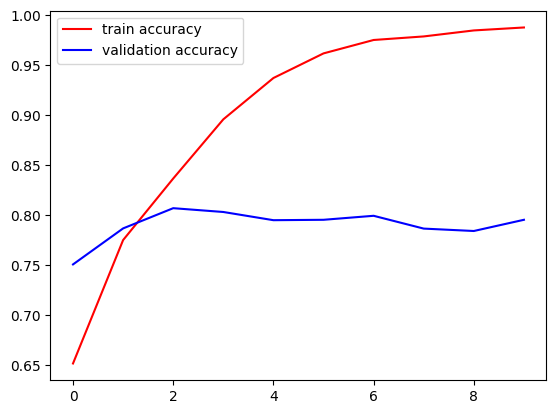

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],'red',label='train accuracy')
plt.plot(history.history['val_accuracy'],'blue',label='validation accuracy')
plt.legend()
plt.show()

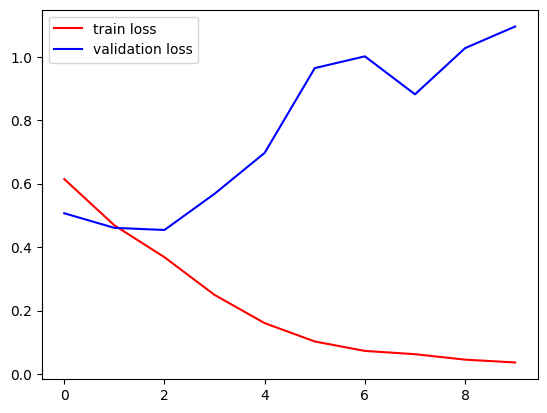

In [27]:
plt.plot(history.history['loss'],'red',label='train loss')
plt.plot(history.history['val_loss'],'blue',label='validation loss')
plt.legend()
plt.show()

In [28]:
import cv2

In [31]:
test_img = cv2.imread('/content/download.jpg')

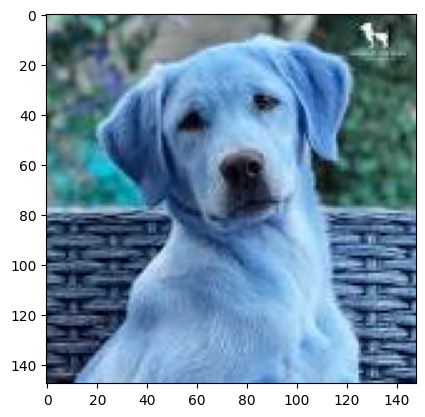

In [32]:
plt.imshow(test_img)

In [33]:
test_img.shape

(148, 148, 3)

In [34]:
test_img = cv2.resize(test_img,(256,256))

In [35]:
test_input = test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 894ms/step


array([[1.]], dtype=float32)

In [37]:
test_img = cv2.imread('/content/Cat.jpg')

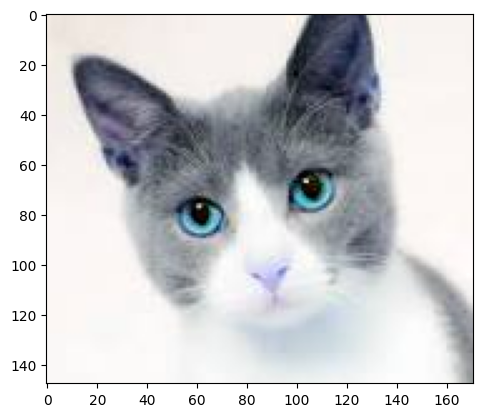

In [38]:
plt.imshow(test_img)

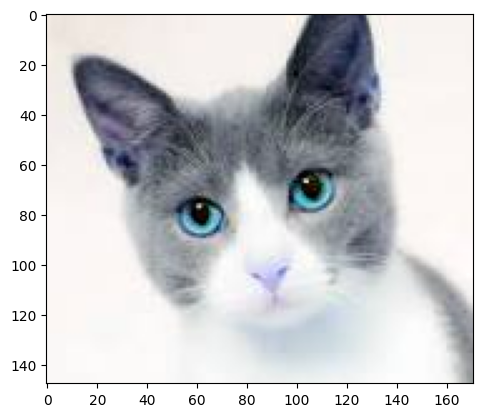

In [39]:
plt.imshow(test_img)

In [40]:
test_img.shape

(148, 171, 3)

In [41]:
test_img = cv2.resize(test_img,(256,256))

In [42]:
test_input = test_img.reshape((1,256,256,3))

In [44]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)